# Introduction to Notebooks


In this notebook we will introduce (briefly) certain capabilities of the notebooks (and python).

In [ ]:
print('hello world')

We can visualise data

Text(0.5, 1.0, 'Example visualisation')

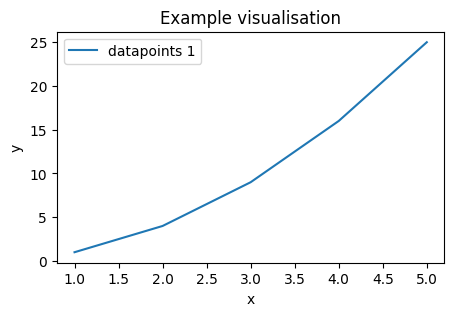

In [13]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

plt.figure(figsize=(5,3))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['datapoints 1'])
plt.title('Example visualisation')

We can also do interactive visualisations



In [34]:
# load dependencies
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Generate some random data
np.random.seed(0)
x = np.random.randn(100)
y = np.random.randn(100)
sizes = np.random.randint(10, 100, 100)

# Initialize a display object
output = widgets.Output()

# Function to update the plot based on slider value
def update_plot(size_factor):
    with output:
        # Clear previous output
        clear_output(wait=True)
        # Create scatter plot with updated size factor
        plt.figure(figsize=(10, 6))
        plt.scatter(x, y, s=sizes * size_factor, alpha=0.5, c='blue', edgecolors='w', linewidth=0.5)
        plt.title(f"Interactive Scatter Plot with Size Factor {size_factor}")
        plt.xlabel("X Axis")
        plt.ylabel("Y Axis")
        plt.grid(True)
        plt.show()

# Create a slider widget
size_slider = widgets.FloatSlider(
    value=1.0,
    min=0.1,
    max=3.0,
    step=0.1,
    description='Size Factor:',
    continuous_update=True
)

# Bind the update function to the slider and display
widgets.interactive(update_plot, size_factor=size_slider)

# Display the slider and the plot output area
display(size_slider, output)

FloatSlider(value=1.0, description='Size Factor:', max=3.0, min=0.1)

Output()

In [10]:
# dropdown menus example

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

# Generate sample data
x = np.linspace(0, 2 * np.pi, 100)

def update_plot(function_name):
    # Clear the previous output to avoid overlapping plots
    # clear_output(wait=True)
    # Plot based on the selected function
    if function_name == 'Sine':
        plt.plot(x, np.sin(x), label='Sine')
    elif function_name == 'Cosine':
        plt.plot(x, np.cos(x), label='Cosine')
    elif function_name == 'Tangent':
        plt.plot(x, np.tan(x), label='Tangent')
    
    # Set plot title and labels
    plt.title(f'{function_name} Function')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    # Add a legend to the plot
    plt.legend()
    
    # Display the updated plot
    plt.show()

# Create a dropdown menu for selecting the function
function_dropdown = widgets.Dropdown(
    options=['Sine', 'Cosine', 'Tangent'],
    value='Sine',
    description='Function:'
)

# Link the dropdown menu to the update_plot function
widgets.interactive(update_plot, function_name=function_dropdown)

interactive(children=(Dropdown(description='Function:', options=('Sine', 'Cosine', 'Tangent'), value='Sine'), …

In [11]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np

x = np.linspace(0, 2 * np.pi, 100)

def update_plot(show_cosine):
    clear_output(wait=True)
    plt.plot(x, np.sin(x), label='Sine')
    if show_cosine:
        plt.plot(x, np.cos(x), label='Cosine')
    plt.title('Sine and/or Cosine Functions')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

cosine_checkbox = widgets.Checkbox(
    value=False,
    description='Show Cosine'
)
widgets.interactive(update_plot, show_cosine=cosine_checkbox)
# display(cosine_checkbox)

interactive(children=(Checkbox(value=False, description='Show Cosine'), Output()), _dom_classes=('widget-inter…

In [13]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np

x = np.linspace(0, 2 * np.pi, 100)

def update_plot(function_type):
    clear_output(wait=True)
    if function_type == 'Sine':
        plt.plot(x, np.sin(x))
    elif function_type == 'Cosine':
        plt.plot(x, np.cos(x))
    elif function_type == 'Tangent':
        plt.plot(x, np.tan(x))
    plt.title(f'{function_type} Function')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

function_radio = widgets.RadioButtons(
    options=['Sine', 'Cosine', 'Tangent'],
    value='Sine',
    description='Function:'
)
widgets.interactive(update_plot, function_type=function_radio)
# display(function_radio)

interactive(children=(RadioButtons(description='Function:', options=('Sine', 'Cosine', 'Tangent'), value='Sine…